In [1]:
import numpy as np

import random
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

from ordec import entropy_complexity
from ordec_borders import get_borders

In [2]:
s = 1

size = 84

In [3]:
def generation_gauss_noise(length, seed = None):
    series = [random.gauss(0.0, 0.25) for i in range(length)]
    series = pd.Series(series)
    
    return series

In [4]:
def generation_white_noise(length, seed = None):
    series = [np.random.uniform(0,0.25) for i in range(length)]
    series = pd.Series(series)
    
    return series

In [5]:
def generation_sinus(length, noise_size, A = 0.5):
    
    start_point = np.round(np.random.uniform(0,7))
    ts = np.sin(np.arange(0+start_point,(length)/10 + start_point,0.1))
    ts = A*np.array(ts)
    noise = [np.random.uniform(-1*noise_size,1*noise_size) for i in range(0,length)]
    noise = np.array(noise)
    ts = ts+noise
    series = pd.Series(ts)
    
    return ts

In [6]:
def generation_linear(length, k_border = False):
    
    b = np.random.uniform(-1,1)
    if k_border != False:
        k = np.random.uniform(k_border[0],k_border[1])
    else:
        k = 0
    
    
    
    ts = [i*k + b for i in range(0,length)]
#     noise = [np.random.uniform(-1*noise_size,1*noise_size) for i in range(length)]
#     noise = np.array(noise)
#     ts = ts+noise
    series = pd.Series(ts)
    
    return series

In [7]:
def skew_tent_map(length, q_base = [0,1]):
    x = np.zeros(length)
    x[0] = np.random.uniform(0,1)
    q = np.random.uniform(q_base[0],q_base[1])
    for i in range(1, len(x)):
        if x[i-1] <= q:
            x[i] = x[i-1]/q
        else:
            x[i] = (1-x[i-1])/(1-q)
    
    return x

In [8]:
def logistic_map(length, r_base = [3.5,4]):
    x = np.zeros(length)
    x[0] = np.random.uniform(0,1)
    r = np.random.uniform(r_base[0],r_base[1])
    for i in range(length-1):
        x[i+1] = r*x[i]*(1-x[i])
        
    return(x)

In [9]:
def plot_ent_com_picture(df, title_name, n, m):
    
    time_columns = df.columns
    sub_df = df.copy()
    sub_df = sub_df[time_columns]
    sub_df = sub_df.T
    time_series = [np.array(sub_df[i]) for i in sub_df.columns]

    EC = [entropy_complexity(series.reshape(-1,1), n=n, m=m) for series in time_series]    # reshape 1d data to 2d array (len x 1)
    min_ec, max_ec = get_borders(n=n, m=m)


    f, ax = plt.subplots(1,1,figsize=(8, 6))

    ax.plot(max_ec[:,0], max_ec[:,1],color='r')
    ax.plot(min_ec[:,0], min_ec[:,1],color='r')

    for EC_i in EC:
        ax.scatter(*EC_i, s=100, marker='.')



    ax.set_xlabel('entropy, $H$')
    ax.set_ylabel('complexity, $C$')

    print('n_samples = ' + str(len(time_series)))
    plt.title(title_name)
    plt.show()

In [10]:
n_samples = 3000

## Cлучайные ряды

In [11]:
gauss_df = pd.DataFrame(columns = np.arange(0,size))

random.seed(s)
for i in range(0,n_samples):
    ts = generation_gauss_noise(size)
    ts = pd.DataFrame(ts,columns  = ['value'])
    gauss_df[i] = ts
    gauss_df = gauss_df.copy()
    
gauss_df = gauss_df.T
gauss_df['label'] = 3
gauss_df['type'] = 'gauss_noise'

In [12]:
white_df = pd.DataFrame(columns = np.arange(0,size))

random.seed(s)
for i in range(0,n_samples):
    ts = generation_white_noise(size)
    ts = pd.DataFrame(ts,columns  = ['value'])
    white_df[i] = ts
    white_df = white_df.copy()
    
white_df = white_df.T
white_df['label'] = 3
white_df['type'] = 'white_noise'

In [13]:
noise_total_df = gauss_df.copy()
noise_total_df = noise_total_df.append(white_df)
noise_total_df = noise_total_df.reset_index(drop = True)
noise_total_df

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,label,type
0,0.322046,0.362361,0.016584,-0.191136,-0.273043,0.007834,-0.255526,-0.359207,0.049828,0.033344,...,-0.119897,0.094703,-0.708948,-0.009972,0.040042,-0.308802,0.116091,-0.139811,3,gauss_noise
1,-0.614775,-0.053330,-0.244711,-0.130149,-0.038071,0.312744,0.025787,-0.007121,0.097251,-0.453023,...,0.089197,-0.287937,0.060598,0.356403,-0.258588,0.200847,-0.152791,0.318209,3,gauss_noise
2,0.196360,0.076016,0.500015,-0.102227,-0.171523,0.463707,-0.219105,0.549723,-0.010033,-0.259168,...,0.048512,-0.238760,-0.160610,-0.076543,0.171516,0.096753,0.249343,-0.204256,3,gauss_noise
3,0.246506,-0.125470,-0.074730,0.433280,0.018525,-0.034845,-0.052569,-0.096212,0.389849,0.344145,...,-0.112423,0.428660,-0.497702,0.021086,0.167047,0.243098,0.027931,-0.096177,3,gauss_noise
4,0.146429,-0.048364,0.118678,-0.714153,0.095377,-0.197665,0.235233,0.186952,0.182208,-0.101131,...,-0.171665,-0.454789,-0.268894,0.280585,-0.028633,-0.334714,0.329793,-0.418193,3,gauss_noise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.116715,0.132486,0.068689,0.085199,0.198501,0.192326,0.022522,0.135563,0.107904,0.232012,...,0.010654,0.169921,0.037351,0.201166,0.157691,0.002224,0.094239,0.006238,3,white_noise
5996,0.249343,0.201753,0.027919,0.026882,0.165173,0.180280,0.038703,0.014884,0.191847,0.210793,...,0.080558,0.105638,0.203459,0.109281,0.102637,0.171634,0.166629,0.193494,3,white_noise
5997,0.227549,0.002681,0.030135,0.060014,0.245283,0.048193,0.110175,0.033676,0.166824,0.072632,...,0.141943,0.107162,0.162171,0.046162,0.094264,0.156518,0.244427,0.086734,3,white_noise
5998,0.021248,0.170781,0.157758,0.005975,0.077436,0.086223,0.060746,0.013771,0.098526,0.094103,...,0.225919,0.070137,0.042337,0.214349,0.240431,0.243842,0.120667,0.171985,3,white_noise


### Хаотические ряды

In [14]:
skew_df = pd.DataFrame()

random.seed(s)
for i in range(0,n_samples):
    ts = skew_tent_map(size)
    ts = pd.DataFrame(ts,columns  = ['value'])
    skew_df[i] = ts
    skew_df = skew_df.copy()
    
skew_df = skew_df.T
# skew_df['label'] = 2
# skew_df['type'] = 'skew_tent_map'

In [15]:
skew_df

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,0.177901,0.209657,0.247081,0.291187,0.343165,0.404421,0.476613,0.561690,0.661955,0.780117,...,0.772618,0.910534,0.590663,0.696100,0.820357,0.966795,0.219225,0.258357,0.304475,0.358826
1,0.353319,0.956315,0.064601,0.199523,0.616231,0.567520,0.639554,0.533030,0.690558,0.457604,...,0.988643,0.016795,0.051871,0.160206,0.494802,0.747090,0.374005,0.925726,0.109837,0.339234
2,0.994034,0.015497,0.025199,0.040974,0.066624,0.108333,0.176152,0.286427,0.465737,0.757300,...,0.028959,0.047087,0.076565,0.124497,0.202435,0.329164,0.535228,0.870293,0.336898,0.547805
3,0.915141,0.170663,0.339446,0.675152,0.653316,0.697230,0.608912,0.786532,0.429314,0.853898,...,0.442894,0.880908,0.239510,0.476382,0.947515,0.105555,0.209948,0.417582,0.830564,0.340760
4,0.710118,0.976782,0.078237,0.111254,0.158204,0.224969,0.319909,0.454916,0.646897,0.919897,...,0.971886,0.094731,0.134709,0.191558,0.272398,0.387354,0.550823,0.783279,0.730261,0.908909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.377780,0.777142,0.433674,0.892122,0.209926,0.431845,0.888360,0.217246,0.446903,0.919337,...,0.789829,0.408983,0.841331,0.308764,0.635166,0.709952,0.564422,0.847617,0.296531,0.610003
2996,0.883043,0.616482,0.760823,0.938960,0.321744,0.397076,0.490046,0.604784,0.746386,0.921143,...,0.965643,0.181093,0.223494,0.275822,0.340402,0.420103,0.518465,0.639856,0.789670,0.974562
2997,0.313874,0.994883,0.007420,0.023908,0.077036,0.248226,0.799838,0.290235,0.935200,0.093960,...,0.169277,0.545447,0.659102,0.494302,0.733262,0.386770,0.889184,0.160683,0.517757,0.699252
2998,0.913097,0.454182,0.561648,0.694541,0.858878,0.737550,0.912063,0.459586,0.568330,0.702803,...,0.288089,0.356255,0.440549,0.544789,0.673692,0.833097,0.872290,0.667453,0.825381,0.912613


In [16]:
logistic_df = pd.DataFrame()

random.seed(s)
for i in range(0,n_samples):
    ts = logistic_map(size)
    ts = pd.DataFrame(ts,columns  = ['value'])
    logistic_df[i] = ts
    logistic_df = logistic_df.copy()
    
logistic_df = logistic_df.T
logistic_df['label'] = 2
logistic_df['type'] = 'logistic_map'

In [17]:
chaos_total_df = logistic_df.copy()
chaos_total_df = chaos_total_df.append(skew_df)
chaos_total_df = chaos_total_df.reset_index(drop=True)
chaos_total_df

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,label,type
0,0.435623,0.922949,0.266965,0.734643,0.731821,0.736763,0.728070,0.743239,0.716400,0.762710,...,0.830630,0.528131,0.935537,0.226397,0.657486,0.845400,0.490647,0.938179,2.0,logistic_map
1,0.324883,0.864151,0.462519,0.979436,0.079353,0.287833,0.807617,0.612147,0.935419,0.238009,...,0.266087,0.769398,0.699032,0.828898,0.558779,0.971359,0.109611,0.384520,2.0,logistic_map
2,0.842490,0.481828,0.906539,0.307636,0.773379,0.636376,0.840208,0.487485,0.907169,0.305774,...,0.768411,0.646148,0.830184,0.511887,0.907225,0.305609,0.770532,0.641997,2.0,logistic_map
3,0.671549,0.812354,0.561412,0.906851,0.311109,0.789333,0.612427,0.874189,0.405062,0.887545,...,0.308124,0.785147,0.621283,0.866566,0.425858,0.900495,0.330006,0.814311,2.0,logistic_map
4,0.835075,0.509854,0.925134,0.256403,0.705820,0.768671,0.658269,0.832762,0.515572,0.924596,...,0.731521,0.727060,0.734634,0.721689,0.743557,0.705893,0.768560,0.658490,2.0,logistic_map
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.377780,0.777142,0.433674,0.892122,0.209926,0.431845,0.888360,0.217246,0.446903,0.919337,...,0.841331,0.308764,0.635166,0.709952,0.564422,0.847617,0.296531,0.610003,NaN,NaN
5996,0.883043,0.616482,0.760823,0.938960,0.321744,0.397076,0.490046,0.604784,0.746386,0.921143,...,0.223494,0.275822,0.340402,0.420103,0.518465,0.639856,0.789670,0.974562,NaN,NaN
5997,0.313874,0.994883,0.007420,0.023908,0.077036,0.248226,0.799838,0.290235,0.935200,0.093960,...,0.659102,0.494302,0.733262,0.386770,0.889184,0.160683,0.517757,0.699252,NaN,NaN
5998,0.913097,0.454182,0.561648,0.694541,0.858878,0.737550,0.912063,0.459586,0.568330,0.702803,...,0.440549,0.544789,0.673692,0.833097,0.872290,0.667453,0.825381,0.912613,NaN,NaN


### Тренды

In [18]:
sin_1_df = pd.DataFrame()

random.seed(s)
for i in range(0,2*n_samples):
    ts = generation_sinus(size, 0.01)
    ts = pd.DataFrame(ts,columns  = ['value'])
    sin_1_df[i] = ts
    sin_1_df = sin_1_df.copy()
    
sin_1_df = sin_1_df.T
sin_1_df['label'] = 1
sin_1_df['type'] = 'sin_1%'

In [19]:
linear_df = pd.DataFrame()

random.seed(s)
for i in range(0,n_samples):
    ts = generation_linear(size, k_border = [-0.01,0.01])
    linear_df[i] = ts 
    linear_df = linear_df.copy()
    
linear_df = linear_df.T
linear_df['label'] = 1
linear_df['type'] = 'linear'

In [20]:
trend_total_df = sin_1_df.copy()
trend_total_df = trend_total_df.append(linear_df)
trend_total_df = trend_total_df.reset_index(drop=True)
trend_total_df

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,label,type
0,0.072862,0.014443,-0.024215,-0.070492,-0.125263,-0.184704,-0.219238,-0.270122,-0.315842,-0.351088,...,-0.463282,-0.473720,-0.497643,-0.488308,-0.509280,-0.497423,-0.490538,-0.470119,1,sin_1%
1,0.453994,0.432342,0.408356,0.376918,0.338284,0.300631,0.263513,0.218515,0.171533,0.115817,...,-0.094699,-0.131397,-0.190767,-0.231036,-0.266542,-0.313701,-0.347126,-0.380306,1,sin_1%
2,-0.141207,-0.094661,-0.031852,0.003732,0.057304,0.098699,0.160663,0.203559,0.251259,0.290920,...,0.437492,0.449260,0.462362,0.478587,0.498102,0.496098,0.497998,0.487395,1,sin_1%
3,-0.141121,-0.099145,-0.036167,0.005267,0.062596,0.117258,0.163930,0.211662,0.242433,0.291075,...,0.420264,0.462360,0.466270,0.491785,0.493716,0.497145,0.502187,0.486492,1,sin_1%
4,-0.143399,-0.090927,-0.048103,0.004989,0.057576,0.112096,0.145961,0.203910,0.247295,0.285588,...,0.435062,0.454039,0.466782,0.487499,0.504246,0.502437,0.498863,0.488801,1,sin_1%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0.867824,0.872351,0.876879,0.881407,0.885935,0.890463,0.894991,0.899519,0.904047,0.908575,...,1.211947,1.216475,1.221003,1.225531,1.230059,1.234587,1.239115,1.243643,1,linear
8996,0.384229,0.375490,0.366750,0.358011,0.349271,0.340531,0.331792,0.323052,0.314313,0.305573,...,-0.279980,-0.288720,-0.297459,-0.306199,-0.314939,-0.323678,-0.332418,-0.341157,1,linear
8997,-0.600908,-0.609706,-0.618504,-0.627303,-0.636101,-0.644899,-0.653698,-0.662496,-0.671294,-0.680092,...,-1.269578,-1.278376,-1.287175,-1.295973,-1.304771,-1.313569,-1.322368,-1.331166,1,linear
8998,0.144840,0.145820,0.146800,0.147780,0.148759,0.149739,0.150719,0.151699,0.152678,0.153658,...,0.219303,0.220282,0.221262,0.222242,0.223222,0.224201,0.225181,0.226161,1,linear


### Собираем

In [21]:
total_n_samples = 6000

In [22]:
n = 5    # window length
m = 1    # embedding dimension

In [23]:
trend_chaos_df = pd.DataFrame()

for i in range(0,total_n_samples):
    ts_1 = np.array(list(sin_1_df.loc[i])[:size])
    ts_2 = np.array(list(chaos_total_df.loc[i])[:size])
    trend_chaos_df [i] = ts_2+ts_1
    trend_chaos_df  = trend_chaos_df.copy()
    
trend_chaos_df  = trend_chaos_df.T

n_samples = 6000


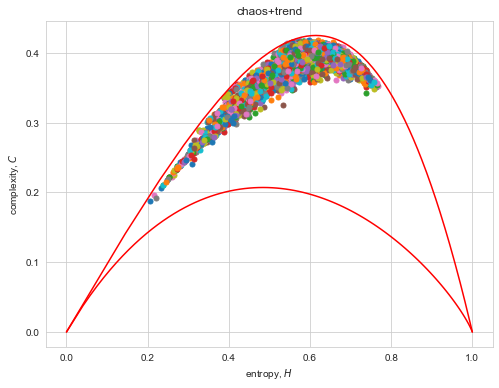

In [24]:
EC_1 = plot_ent_com_picture(trend_chaos_df, 'chaos+trend', n, m)

In [25]:
trend_noise_df = pd.DataFrame()

for i in range(0,total_n_samples):
    ts_1 = np.array(list(sin_1_df.loc[i])[:size])
    ts_3 = np.array(list(noise_total_df.loc[i])[:size])
    trend_noise_df  [i] = ts_1+ts_3
    trend_noise_df   =trend_noise_df .copy()
    
trend_noise_df  = trend_noise_df.T

n_samples = 6000


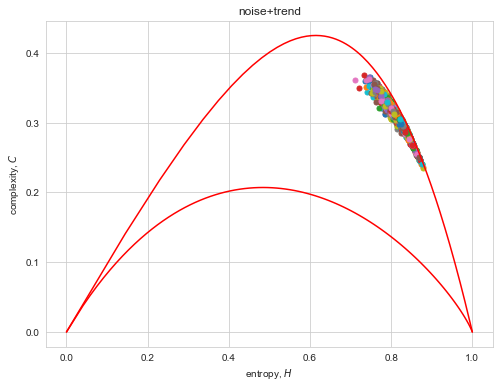

In [26]:
EC_2 = plot_ent_com_picture(trend_noise_df, 'noise+trend', n, m)

In [27]:
total_df = trend_noise_df.copy()
total_df = total_df.append(trend_chaos_df)
total_df = total_df.reset_index(drop=True)

n_samples = 12000


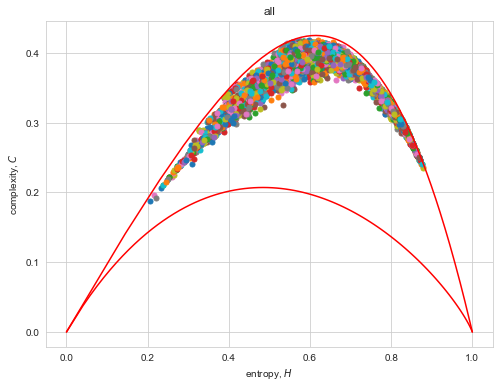

In [28]:
EC_3 = plot_ent_com_picture(total_df, 'all', n, m)

In [30]:
total_df.to_csv('synt_dataset_v2.csv', index = False)

### Восстановление

In [11]:
n = 5    # window length
m = 1    # embedding dimension

In [12]:
def shift_to_0(ts):
    return list(np.array(ts) - min(ts))

In [13]:
def scale_to_0_1(ts):
    return list(np.array(ts)/max(ts))

In [14]:
def scale_to_0_max(ts,border):
    maximum = np.random.randint(border[0],border[1]) 
    return list(np.round(np.array(ts)*maximum))

In [15]:
def shift_to_min(ts,border):
    minimum = np.random.randint(border[0],border[1]) 
    return list(np.array(ts)+minimum)

In [16]:
total_df = pd.read_csv('synt_dataset_v2.csv')

In [17]:
total_df_0 = pd.DataFrame()
for i in range(0,len(total_df)):
    ts = list(total_df.loc[i])
    new_ts = shift_to_0(ts)
    total_df_0[i] = new_ts
    total_df_0 = total_df_0.copy()
    
total_df_0 = total_df_0.T

n_samples = 12000


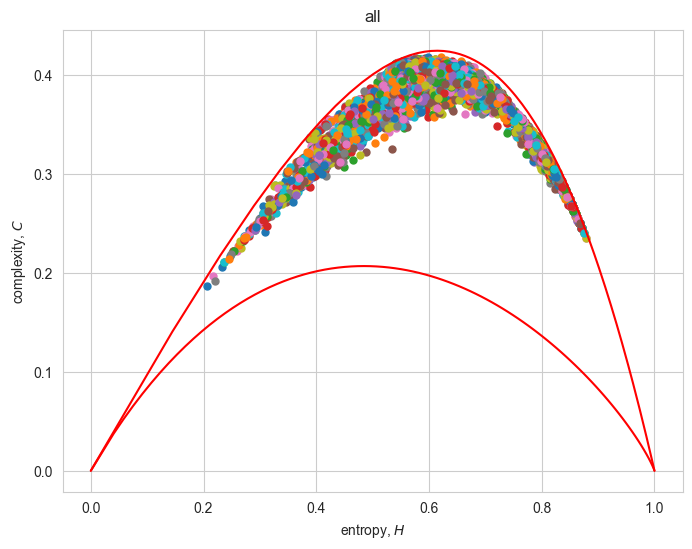

In [18]:
EC_3 = plot_ent_com_picture(total_df_0, 'all', n, m)

In [19]:
total_df_0_1 = pd.DataFrame()
for i in range(0,len(total_df)):
    ts = list(total_df_0.loc[i])
    new_ts = scale_to_0_1(ts)
    total_df_0_1[i] = new_ts
    total_df_0_1 = total_df_0_1.copy()
    
total_df_0_1 = total_df_0_1.T

n_samples = 12000


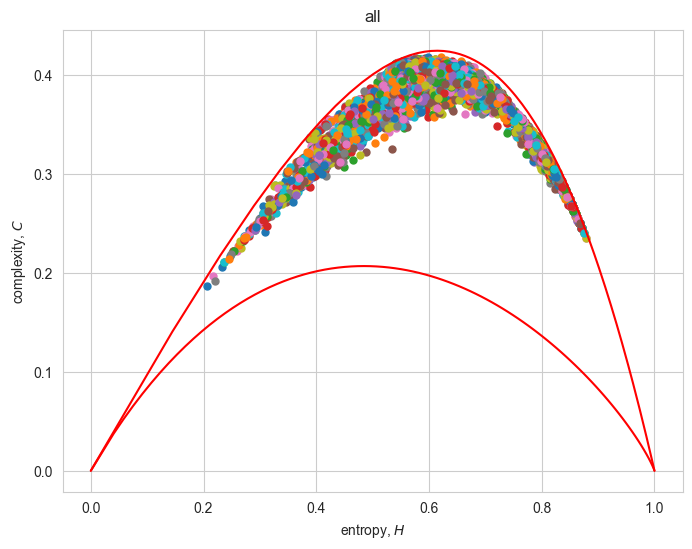

In [20]:
EC_3 = plot_ent_com_picture(total_df_0_1, 'all', n, m)

In [21]:
ts = list(total_df_0_1.loc[0])

In [22]:
random.seed(s)

total_df_0_max = pd.DataFrame()
for i in range(0,len(total_df)):
    ts = list(total_df_0_1.loc[i])
    new_ts = scale_to_0_max(ts,[60,140])
    total_df_0_max[i] = new_ts
    total_df_0_max = total_df_0_max.copy()
    
total_df_0_max = total_df_0_max.T

n_samples = 12000


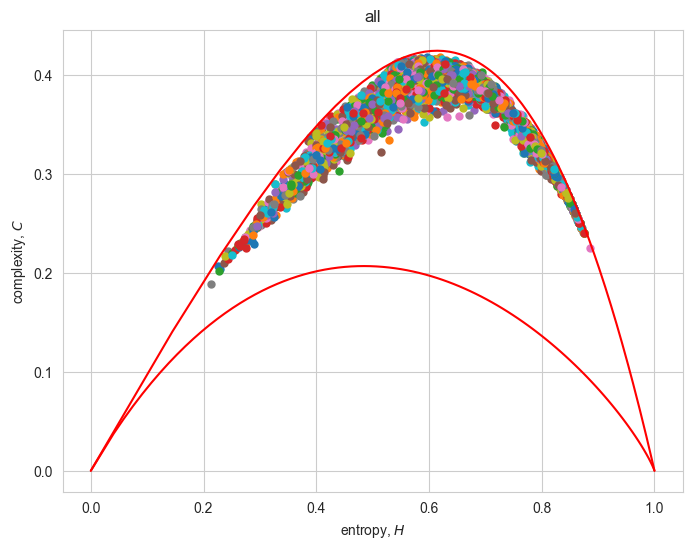

In [23]:
EC_3 = plot_ent_com_picture(total_df_0_max, 'all', n, m)

In [24]:
random.seed(s)

total_df_min_max = pd.DataFrame()
for i in range(0,len(total_df)):
    ts = list(total_df_0_max.loc[i])
    new_ts = shift_to_min(ts,[0,8])
    total_df_min_max[i] = new_ts
    total_df_min_max = total_df_min_max.copy()
    
total_df_min_max = total_df_min_max.T

n_samples = 12000


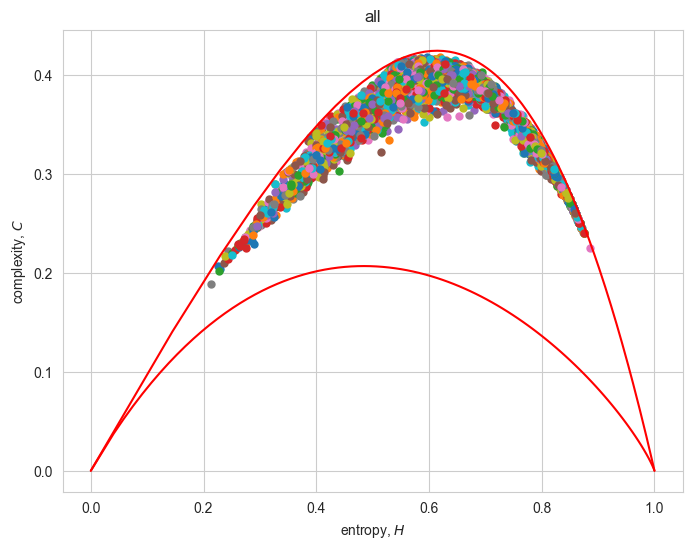

In [25]:
EC_3 = plot_ent_com_picture(total_df_min_max, 'all', n, m)

In [26]:
total_df_min_max.to_csv('synt_dataset_v2.csv')

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,110.0,109.0,83.0,66.0,57.0,72.0,52.0,42.0,66.0,63.0,...,78.0,52.0,45.0,59.0,4.0,51.0,53.0,30.0,59.0,43.0
1,39.0,67.0,56.0,60.0,63.0,80.0,63.0,58.0,61.0,29.0,...,55.0,81.0,47.0,25.0,40.0,54.0,19.0,41.0,21.0,44.0
2,65.0,61.0,84.0,58.0,57.0,89.0,59.0,98.0,73.0,64.0,...,70.0,95.0,85.0,72.0,76.0,81.0,94.0,90.0,97.0,75.0
3,41.0,27.0,31.0,55.0,40.0,40.0,41.0,41.0,63.0,63.0,...,65.0,60.0,49.0,74.0,35.0,58.0,65.0,68.0,59.0,53.0
4,32.0,26.0,35.0,4.0,38.0,28.0,47.0,47.0,49.0,39.0,...,53.0,42.0,42.0,32.0,40.0,62.0,51.0,39.0,65.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,45.0,63.0,49.0,70.0,43.0,52.0,72.0,45.0,54.0,74.0,...,68.0,52.0,69.0,46.0,58.0,60.0,52.0,62.0,38.0,49.0
11996,75.0,57.0,74.0,92.0,46.0,56.0,66.0,80.0,95.0,112.0,...,123.0,62.0,67.0,74.0,80.0,88.0,97.0,106.0,119.0,133.0
11997,59.0,92.0,46.0,47.0,50.0,59.0,85.0,61.0,91.0,50.0,...,51.0,68.0,72.0,63.0,72.0,54.0,76.0,38.0,53.0,59.0
11998,76.0,48.0,58.0,71.0,86.0,80.0,95.0,67.0,77.0,88.0,...,64.0,70.0,77.0,84.0,94.0,105.0,107.0,92.0,102.0,107.0


In [29]:
total_df_min_max.to_csv('synt_dataset_v2_final_restored.csv', index = False)